In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import scipy.integrate as int
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (7,7)

Consider

\begin{align}
x' &= x(3-x-2y) \\
y' &= y(2-x-y)
\end{align}

In [2]:
def dX_dt(X, t=0):
    return np.array([ X[0] * (3 - X[0] - 2*X[1]),
                      X[1] * (2 - X[0] - X[1]) ])

In [3]:
t  = np.linspace(0, 20, 1000)
y0 = [0. , 0.1]

X, infodict = int.odeint(dX_dt, y0, t, full_output=True)
infodict['message']

'Integration successful.'

Text(0, 0.5, 'y1, y2')

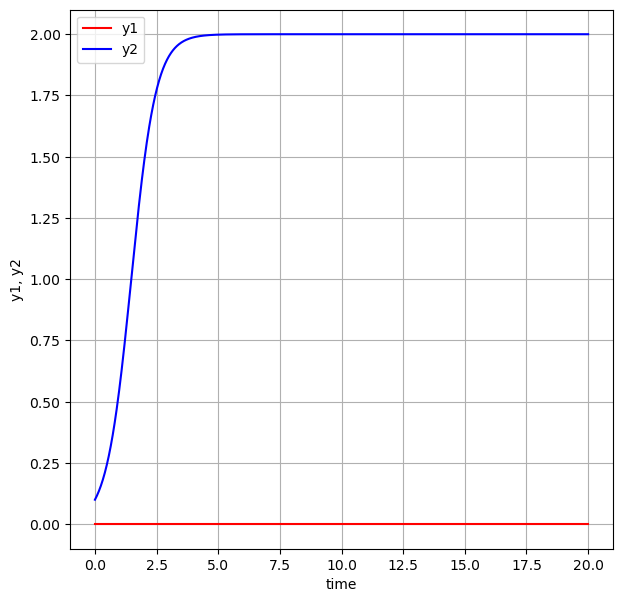

In [21]:
y1, y2 = X.T

plt.plot(t, y1, 'r-', label='y1')
plt.plot(t, y2  , 'b-', label='y2')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('y1, y2')

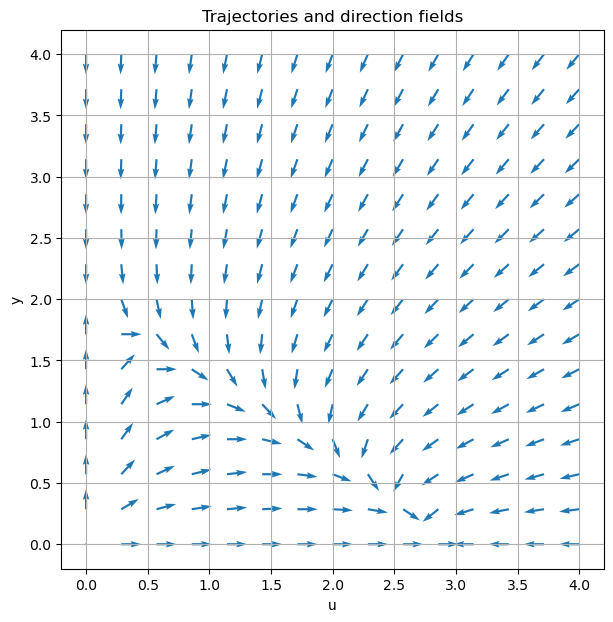

In [15]:
x = np.linspace(0, 4, 15)
y = np.linspace(0, 4, 15)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute derivative on grid


if True:
    M = (np.hypot(DX1, DY1))                           # Norm of the growth rate 
    M[ M == 0] = 1.                                 # Avoid zero division errors 
    DX1 /= M                                        # Normalize each arrows
    DY1 /= M


#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
plt.title('Trajectories and direction fields')
Q = plt.quiver(X1, Y1, DX1, DY1, color="C0")
plt.xlabel('u')
plt.ylabel('y')
plt.grid()